**1. Introduction**

This report will showcase my data science skills by analysing data from Kaggle published recently where a bank manager is disturbed by the trend where more customers leaving their credit card services. They want to know how they can predict this in the future so they can proactively approach customers to prevent them from leaving. 

This is a classic business issue that happens in all industries and I will explore the customer behaviour to get more insights as well as applying the predictive modelling.



**2. Dataset and Features**

The dataset is not large with 10,127 rows and 24 columns. There are 23 features consisting of 6 objects and the remaining are either integer or float. It is a clean dataset with no null values encountered. 

From the information given, we also know the attrition rate is 16% in the dataset. This presents a problem with imbalance data to do accurate predictive modelling. I will consider this issue later after applying the predictive modelling and reviewing the final accuracy score. 

Some column descriptions are self-explanatory and the rest can be seen below :  

- Attrition_Flag           : this is flagging if a customer leaving 
- Card_Category            : different card products offered to customers
- Months_on_book           : how long the customers with the bank
- Total_Relationship_Count : how many products customers have
- Months_Inactive_12_mon   : how many months customers have not used the cards
- Contacts_Count_12_mon    : how many times we contact customers
- Total_Revolving_Bal      : what is the oustanding balance
- Avg_Open_To_Buy          : opportunity to open new credit limit
- Total_Trans_Amt          : total transactions in the last 12 months


In [349]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [150]:
import pandas as pd
import seaborn as sns


dataset = pd.read_csv('BankChurners.csv')
dataset = dataset.drop([ 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)


2


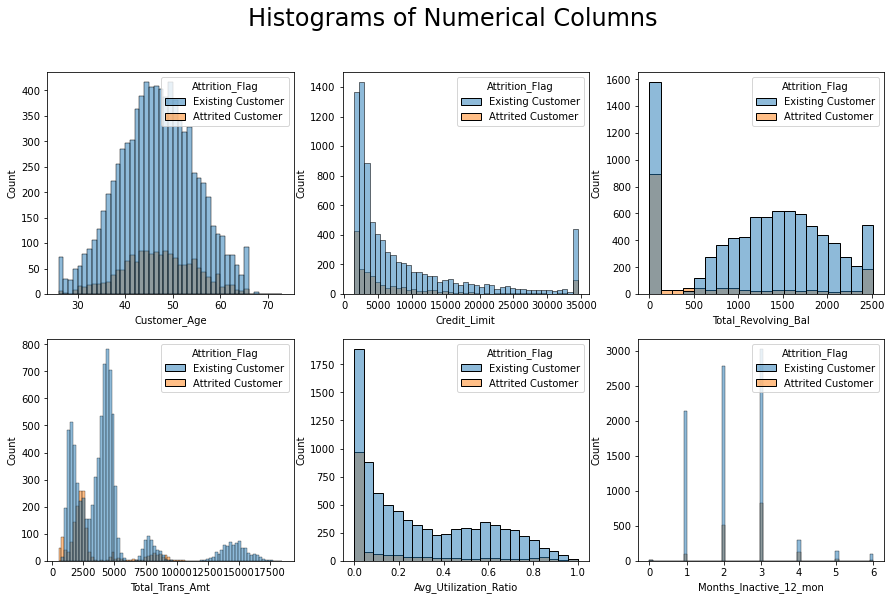

In [99]:
columns = ['Customer_Age', 'Credit_Limit' ,'Total_Revolving_Bal'
           ,'Total_Trans_Amt','Avg_Utilization_Ratio','Months_Inactive_12_mon'
          ]

#columns = ['Customer_Age', 'Credit_Limit' ,'Total_Revolving_Bal'
#           ,'Total_Trans_Amt','Avg_Utilization_Ratio','Months_on_book'
#           ,'Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon'
#          ]


norow = int(round(len(columns)/3,0))
print (norow)

fiq, ax = plt.subplots(norow, 3, figsize=(15,9))


plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")

for i,d in enumerate(columns):
     #print (i,d)
     if i < 3:
         chart = sns.histplot(x=dataset.loc[:,d], data=dataset, ax=ax[0,i], hue='Attrition_Flag')
     else:
         chart = sns.histplot(x=dataset.loc[:,d], data=dataset, ax=ax[1,i-6], hue='Attrition_Flag')   
        
        #chart.set(title='Tips Bar Plot Default (Avg)')

**2.1 Exploratory Data Analysis Numerical Columns**

Further exploration from numerical columns showing some insights on the relationships between attrition flag and other features.

- Customer age does not show any intriquing behavious as both histograms are in line in terms of distribution.
- The credit limit, however, shows attrition tends to occur to those customers with credit limit less 10,000.
- Customers with zero revolving balance also have high attrition as well as customers with 2500 revolving balance. 
- There is no attrition for customers with total transaction amounts greater than 12,500.
- Attrition is high for those customers with zero utilisation ratio
- Attrition is also high when customers have been inactive for 2 and 3 months


    
From the above observations, we can see some interesting patterns and make some assumptions why they have more customers leaving the bank. Those customers seem to have not used their cards for more than 2 months and they make up the numbers in zero utilisation ratio as well as zero revolving balance. 



There are still more questions to ask based on the facts we see above such as :

- Those customers who left, have they been long with the bank and how many products do they have?
- Have we made enough contacts with them to retain them?
- Do they response well with the column average open to buy?
- Is there specific cohort based on age, dependent?



In [98]:

# step 1 split the tables
att_cust = dataset[dataset['Attrition_Flag']=='Attrited Customer']
reg_cust = dataset[dataset['Attrition_Flag']!='Attrited Customer']



a = att_cust.describe()
a =a.loc['mean',
        ['Customer_Age','Months_on_book','Total_Relationship_Count'
         ,'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Avg_Open_To_Buy'
        ,'Dependent_count']]


b = reg_cust.describe()
b =b.loc['mean',
        ['Customer_Age','Months_on_book','Total_Relationship_Count'
         ,'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Avg_Open_To_Buy'
        ,'Dependent_count']]

frame = { 'Attrited Customer': a, 'Existing Customer': b } 
  
result = pd.DataFrame(frame) 
pd.options.display.float_format = '{:,.2f}'.format
result


,Attrited Customer,Existing Customer
Customer_Age,46.66,46.26
Months_on_book,36.18,35.88
Total_Relationship_Count,3.28,3.91
Months_Inactive_12_mon,2.69,2.27
Contacts_Count_12_mon,2.97,2.36
Credit_Limit,"8,136.04","8,726.88"
Avg_Open_To_Buy,"7,463.22","7,470.27"
Dependent_count,2.40,2.34


The statistic above shows the average for different features between existing customers and attrited customers. 
We can asnwer some of the previous questions :

- On average, the attrited customers have been with the bank about 36 months and in line with existing ones
- We actually make similar contacts with these customers compared to existing ones 
- They are also open to similar new credit limit 
- And of average, they also have similar dependent so there is no specific cohort on attrition.

As per previous assumption, we do know these customers have been inactive for quite a while before they close their cards. Another interesting fact from the above comparison, the existing customers also have average around 2.3 months inactivity. 

>This is quite concerning which means there are potentially some existing customers that might follow to leave the bank.


**Customers Churned Transactions vs Revolving Balance**

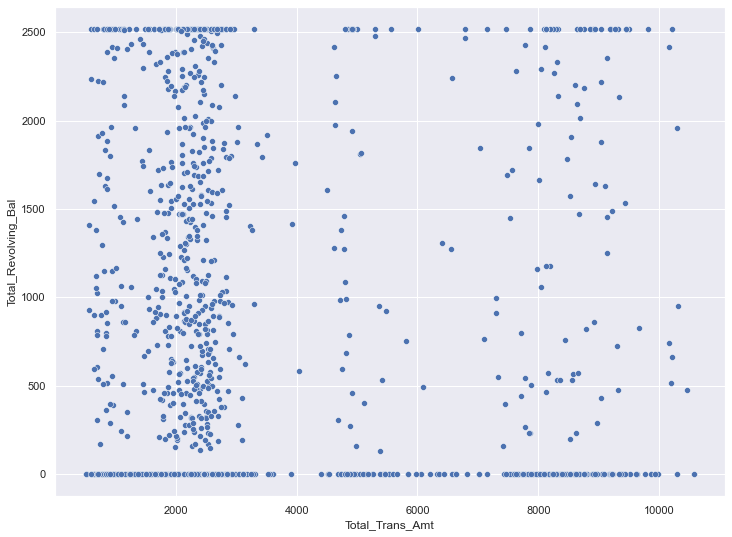

In [267]:

plt.subplots(figsize=(12,9))
sns.scatterplot(y='Total_Revolving_Bal',x='Total_Trans_Amt',data=att_cust)
plt.show()

In [331]:
att_cust.loc[att_cust.Total_Revolving_Bal==0,'Status'] = 'Nil Balance'
att_cust.loc[att_cust.Total_Revolving_Bal!=0,'Status'] = 'Default'


att_cust.groupby('Status')['Total_Trans_Ct'].count()

Status
Default        734
Nil Balance    893
Name: Total_Trans_Ct, dtype: int64

From the above, we can see a cluster among the attrited customers where a lot of them made less than 4,000 transaction amounts and they have revolving balances in their account. That means these customers have defaulted and left the bank. 

Further grouping between zero and non-zero balances showing 734 of these customers have defaulted in their payments whilst remaining 893 customers have left with no outstanding amounts due. 

>This give an insight to bank manager that almost half of the attrited customers have left because they have defaulted in their overdue payments. Higher attrition due to bad customers leaving probably is not a bad thing.

**2.2 Exploratory Data Analysis Categorical Columns**

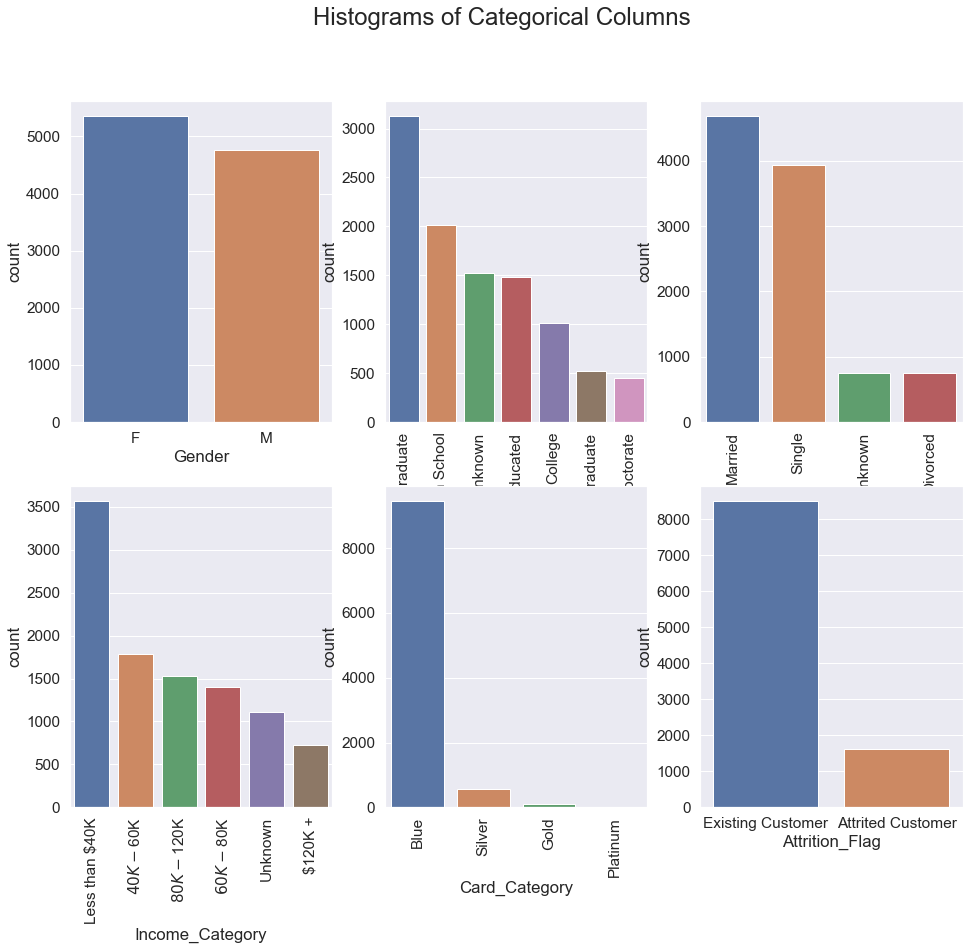

In [347]:
columns = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category','Attrition_Flag']


norow = int(round(len(columns)/3,0))

fiq, ax = plt.subplots(norow, 3, figsize=(16,13))


plt.suptitle('Histograms of Categorical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")

for i,d in enumerate(columns):
     #print (i,d)
     if i < 3:
         chart = sns.countplot(x=dataset.loc[:,d], data=dataset, order = dataset.loc[:,d].value_counts().index, ax=ax[0,i])
         sns.set(font_scale = 1)
         if dataset.loc[:,d].nunique() > 3: 
             chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  

     else:
         chart = sns.countplot(x=dataset.loc[:,d], data=dataset, order = dataset.loc[:,d].value_counts().index, ax=ax[1,i-6])
         sns.set(font_scale = 1) 
         if dataset.loc[:,d].nunique() > 3: 
             chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
            
        
        #chart.set(title='Tips Bar Plot Default (Avg)')



We can see further information about the customers from the categorical columns.
- Based on gender, we have almost equal split between males and females
- Based on education, we can also see we have significant customers with graduate degrees
- Marital status is also closely split between single and married
- Another interest fact, we have significant customers with salary less than $40k
- We have 4 product categories but majority of customers signed up with Blue
- The actual customer that moved out is 1627 customers out 8500 existing customers (16%)
    
We are going to look at further the profiles of the past-customers vs existing-customers to see the if compositions are different. 



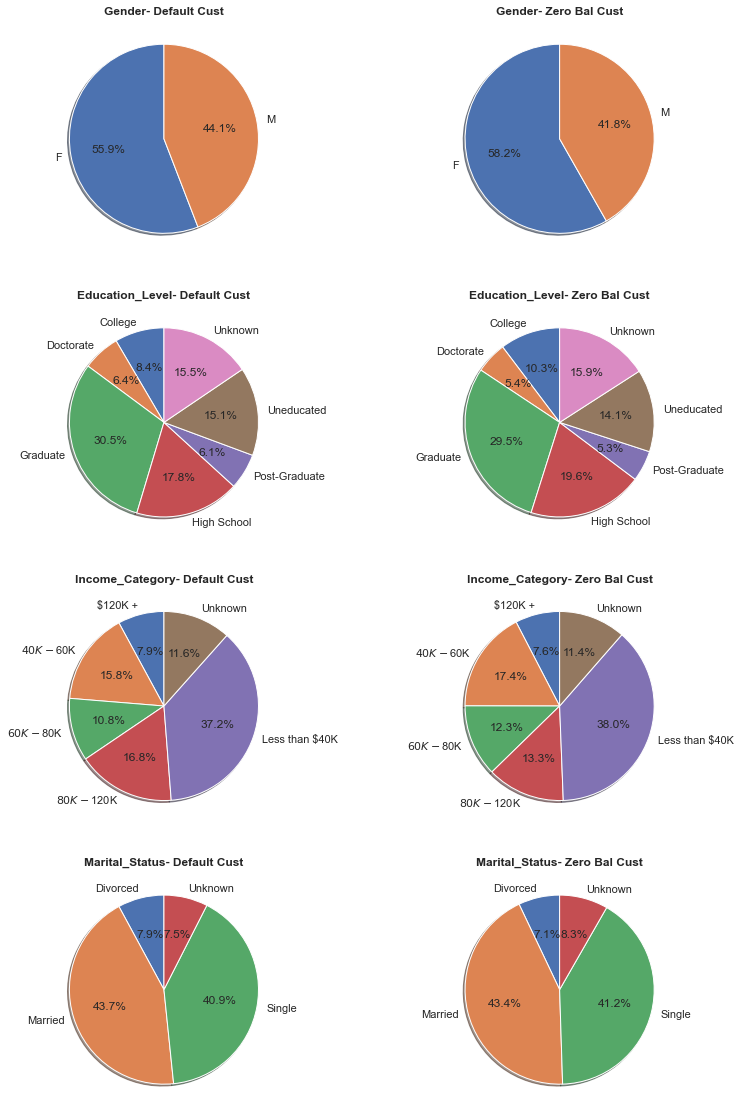

In [344]:
default = att_cust[att_cust['Status']=='Default']
zerobal = att_cust[att_cust['Status']!='Default']
columns = ['Gender','Education_Level','Income_Category','Marital_Status']


fiq, ax = plt.subplots(4, 2, figsize=(13,20))


#plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="centre",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")


for i,d in enumerate(columns):
       
        #### create pctg table 1 and plot to ax 1####
        a = default[[d,'Customer_Age']].groupby(d,as_index=False).count()
        total = default[d].count()
        a['Total'] = total
        a['Pctg'] = a['Customer_Age']/a['Total']
        sizes = a['Pctg']
        labels = a[d]
        ax[i,0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
        ax[i,0].set_title(d + '- Default Cust',fontweight="bold")
        
        
for i,d in enumerate(columns):
       
        #### create pctg table 1 and plot to ax 1####
        a = zerobal[[d,'Customer_Age']].groupby(d,as_index=False).count()
        total = zerobal[d].count()
        a['Total'] = total
        a['Pctg'] = a['Customer_Age']/a['Total']
        sizes = a['Pctg']
        labels = a[d]
        ax[i,1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)  
        ax[i,1].set_title(d + '- Zero Bal Cust', fontweight="bold")



Based on the observations above there are some interesting findings for customers who churned.

- Male composition is higher by ~2% from customers with zero revolving balance.
- Some percentage increases in graduate, postgraduate and doctorate.
- Customers with 80k-120k salary goes up by ~3%




**3. Prediction Machine Learning**


We have seen some of the insights and assumptions regarding why the customers have left. We know half of those customers have defaulted in their payments but we also know there are existing customers who have been inactive which may end up leaving the bank. 

We are going to predict those customers who will churn using random forests which are widely used for classifiction problem like this one. We will see if the final prediction of random observations, rows as well as multiple trees will tackle the imbalance issue.

The dataset will be split 70% for training and remaining 30% will be data without label to determine the accurancy of the model. 


In [133]:

import time


# Step 1 Convert object columns to category and converting them to numerical values

start = time.time()

df = dataset
other = df.select_dtypes(exclude=['category','int64','float64']).columns

# convert other to category
for i in other:
    df[i]=df[i].astype('category')

# pick up those category columns only and apply the cat codes (numeric)    
cat_columns = df.select_dtypes(include='category').columns
df[cat_columns]=df[cat_columns].apply(lambda x:x.cat.codes)



# Step 2 Split the dataset to train/test

from sklearn.model_selection import train_test_split

numeric_col = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count'
               ,'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit'
               ,'Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct','Avg_Utilization_Ratio']

X = dataset[numeric_col]
y = dataset['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)



# Step 3 Apply Random Forest using some random variables (finetuning later)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(min_samples_split=5,n_estimators=100, random_state=20)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

duration = round(time.time() - start,2)

print ('It took {} seconds to process'.format(duration))


It took 0.81 seconds to process


In [134]:
from sklearn.metrics import classification_report

target_names = ['Attrited','Existing']   # remember the order is 0,1  hence the labelling follow that order

print(classification_report(y_test,prediction,target_names=target_names))

              precision    recall  f1-score   support

    Attrited       0.91      0.78      0.84       496
    Existing       0.96      0.98      0.97      2543

    accuracy                           0.95      3039
   macro avg       0.93      0.88      0.91      3039
weighted avg       0.95      0.95      0.95      3039



<Figure size 2016x1440 with 0 Axes>

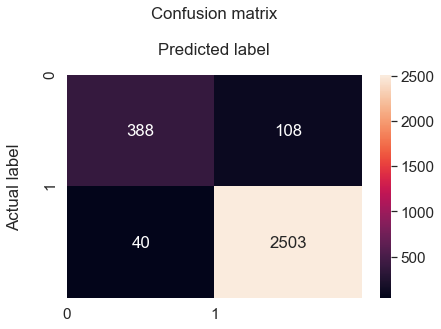

In [144]:
import numpy as np

cm = confusion_matrix(y_test, prediction) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

plt.show()

The result of the random forest is good with 95% accuracy and F1 score of 84% for the determining customers who will churn. It seems that we do not have imbalance problem with our model at this stage. But we will try to fine-tune this model by finding the optimal values in some of the parameters used.

The fine-tuning will look at the best parameters for min samples split and the numbers of trees in the model. 

In [345]:
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_split':[5,10,15,20], 'n_estimators':[50, 100, 150]}


start = time.time()

tuning = GridSearchCV(model,parameters,cv=10)
tuning.fit(X_train,y_train)

duration = round(time.time() - start)

print ('It took {} seconds'.format(duration))



It took 82 seconds


In [140]:
best_accuracy = round(tuning.best_score_,2)
best_parameters = tuning.best_params_
best_accuracy, best_parameters

(0.96, {'min_samples_split': 10, 'n_estimators': 50})

The fine-tuning showing the best result of 96% with the recommended min samples split of 10 and using multiple trees of 50. Now, we are going to use the fine-tuned model to predict X_test and see if the accuracy will improve.

In [141]:
prediction2 =  tuning.predict(X_test)

from sklearn.metrics import classification_report

target_names = ['Attrited','Existing']   # remember the order is 0,1  hence the labelling follow that order

print(classification_report(y_test,prediction2,target_names=target_names))

              precision    recall  f1-score   support

    Attrited       0.89      0.77      0.82       496
    Existing       0.96      0.98      0.97      2543

    accuracy                           0.95      3039
   macro avg       0.92      0.87      0.90      3039
weighted avg       0.94      0.95      0.94      3039



<Figure size 2016x1440 with 0 Axes>

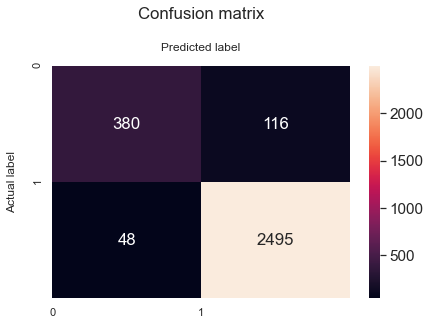

In [346]:
import numpy as np

cm = confusion_matrix(y_test, prediction2) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

plt.show()

We can see the results pretty much in line with previous model before fine-tuning but this has been cross-validated and can generalise better against a new dataset. 

You can also see from the ROC curve below that our model works well and trending above the mid-point which means it can distinguish the classification problems well. 

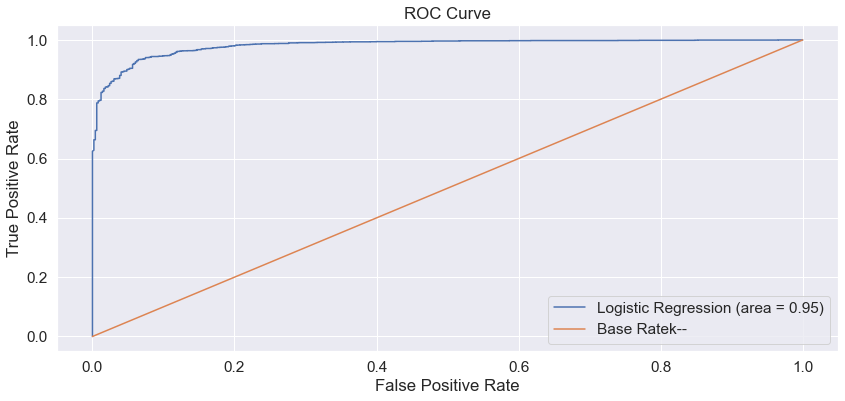

In [123]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
model.fit(X_train, y_train) 
probs = model.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, prediction )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


# plot the figures
plt.figure(figsize=(14, 6))

plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()